### Engineered by Ifeanyi Anthony Omeifejideofor



## INTRODUCTION

##### THE AUTO ORACLE 🚗🚗🚗🚗

- Auto Oracle is a machine learning model that has been developed to predict the prices of used cars in the US market. The model uses a variety of features such as make, model, year, mileage, location, and other relevant data to predict the price of a used car accurately. The model has been trained on a large dataset of used car sales data, which has allowed it to learn complex patterns and relationships between various features and prices.

##### Setting  up Environment and Ensuring GPU's are working

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices()))

Num GPUs Available:  3


In [2]:
import tensorflow
tensorflow.test.is_gpu_available()

True

## 1. Problem Definition
For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

```How well can we predict the future sale price of a car, given its characteristics previous examples of how much similar cars have been sold for?```

### Preparing the tools

In [3]:
#import data analysis libraries
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-whitegrid')

#Import Machine Learning Librabries
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

#Import Evaluation Metrices.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Importing the data

In [4]:
car_data = pd.read_csv("./Documents/Personal_items/Assignments/Data_Mining/used_cars_data_large.csv")
car_data = car_data.reset_index(drop=True)

In [5]:
car_data

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,4S4BRBAC6D1231399,37.8 in,NaN,NaN,NaN,Wagon,NaN,Marlborough,21.0,NaN,...,M,6-Speed Manual,t44089,2.5i,NaN,AWD,All-Wheel Drive,107.9 in,71.7 in,2013
1,2GNALBEK6F1115594,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Schenectady,22.0,NaN,...,A,Automatic,t54771,1LT FWD,NaN,FWD,Front-Wheel Drive,112.5 in,72.5 in,2015
2,KNDPMCAC3L7826222,38.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,Schenectady,NaN,NaN,...,A,6-Speed Automatic Overdrive,t85078,LX AWD,NaN,AWD,All-Wheel Drive,105.1 in,73 in,2020
3,1FM5K8D87HGB85743,39.5 in,NaN,NaN,NaN,SUV / Crossover,NaN,Ravena,16.0,NaN,...,A,Automatic,t67141,XLT AWD,NaN,AWD,All-Wheel Drive,112.8 in,90.2 in,2017
4,3VWCB7BU5LM064274,37.4 in,NaN,NaN,NaN,Sedan,NaN,Noblesville,30.0,NaN,...,A,8-Speed Automatic,t89378,1.4T S FWD,NaN,FWD,Front-Wheel Drive,105.7 in,70.8 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298994,5NPDH4AE4GH790086,33.1 in,NaN,NaN,NaN,Sedan,NaN,Washington,28.0,NaN,...,A,Automatic,t57839,SE Sedan FWD,NaN,FWD,Front-Wheel Drive,106.3 in,69.9 in,2016
298995,5N1AT2MV0FC816819,37.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,South Park,25.0,NaN,...,A,Automatic,t56729,SL AWD,NaN,AWD,All-Wheel Drive,106.5 in,72.4 in,2015
298996,1G11Z5SA4KU133961,39.8 in,NaN,NaN,NaN,Sedan,NaN,Schaumburg,22.0,NaN,...,A,Automatic,t79408,LT FWD,NaN,FWD,Front-Wheel Drive,111.7 in,84.3 in,2019
298997,ZACNJABB8LPL30035,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Brunswick,22.0,NaN,...,A,Automatic,t87003,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2020


- A quick View of the dataset. we can tellThe dataset contains missing or null values, 
indicated by the presence of NaN (Not a Number) markers


In [6]:
#Checking for data types of the values in the dataframe.
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298999 entries, 0 to 298998
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      298999 non-null  object 
 1   back_legroom             284657 non-null  object 
 2   bed                      1684 non-null    object 
 3   bed_height               32716 non-null   object 
 4   bed_length               32716 non-null   object 
 5   body_type                297662 non-null  object 
 6   cabin                    5549 non-null    object 
 7   city                     298999 non-null  object 
 8   city_fuel_economy        252495 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             298999 non-null  int64  
 11  dealer_zip               298999 non-null  object 
 12  description              291555 non-null  object 
 13  engine_cylinders         290445 non-null  object 
 14  engi

- The dataframe is composed of both numerical and non-numerical data types, including object, float, and integer formats

In [7]:
car_data.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,252495.000000,0.0,298999.000000,283498.000000,252495.000000,283498.000000,0.0,298999.000000,2.989990e+05,298999.000000,284359.000000,147337.000000,2.989990e+05,298999.000000,295652.000000,298991.000000,0.0,298999.000000
mean,22.608135,NaN,78.388861,2830.107091,29.322779,239.487323,NaN,40.897553,2.752395e+08,-78.918594,28583.471489,1.457455,2.953596e+04,517.407199,4.278027,229550.251018,NaN,2017.732320
std,7.913608,NaN,111.126776,1241.616972,7.093029,85.542755,NaN,1.248655,9.060417e+06,4.977591,41237.578593,0.829647,1.748953e+04,1006.508370,0.493104,129431.775797,NaN,3.932002
min,8.000000,NaN,0.000000,700.000000,11.000000,70.000000,NaN,25.767400,4.436146e+07,-122.343000,0.000000,1.000000,3.500000e+02,0.000000,1.000000,43980.000000,NaN,1927.000000
25%,18.000000,NaN,14.000000,2000.000000,25.000000,170.000000,NaN,40.032700,2.743757e+08,-81.336700,5.000000,1.000000,1.864000e+04,0.000000,4.000000,62772.000000,NaN,2017.000000
50%,21.000000,NaN,35.000000,2500.000000,29.000000,225.000000,NaN,40.824800,2.784885e+08,-76.852600,7556.000000,1.000000,2.676500e+04,0.000000,4.342105,280046.000000,NaN,2020.000000
75%,26.000000,NaN,83.000000,3500.000000,33.000000,295.000000,NaN,41.768400,2.803922e+08,-75.265500,41129.500000,2.000000,3.742200e+04,742.000000,4.600000,332501.000000,NaN,2020.000000
max,127.000000,NaN,2915.000000,8400.000000,127.000000,808.000000,NaN,48.463500,2.817205e+08,-71.168600,514033.000000,13.000000,1.250000e+06,126027.000000,5.000000,440439.000000,NaN,2021.000000


- The dataframe contains missing values in several columns, as indicated by the zero count of NaN markers

In [8]:
#Checking columns with Null Values
car_data.isnull().sum()

vin                          0
back_legroom             14342
bed                     297315
bed_height              266283
bed_length              266283
                         ...  
wheel_system             13728
wheel_system_display     13728
wheelbase                14342
width                    14342
year                         0
Length: 66, dtype: int64

- The dataframe contains missing values in several columns, as indicated by the non-zero count of NaN markers. The following is a summary of the missing value count per column

- The total missing value count for each column can be seen in the dataframe's dtype

In [9]:
#Removing empty column from the dataset.
car_data.drop(['vehicle_damage_category', 'combine_fuel_economy', 'is_certified'], axis = 1, inplace = True)

- These columns are totally empy with No Values except for Null values or NAN hence we drop them*

In [10]:
cols_to_clean = ['width', 'length', 'height', 'front_legroom', 'back_legroom', 'wheelbase', 'maximum_seating', 'fuel_tank_volume']

car_data[cols_to_clean] = car_data[cols_to_clean].astype(str).replace(['in', 'seats', 'gal'], ' ', regex=True)
car_data[cols_to_clean] = car_data[cols_to_clean].apply(pd.to_numeric, errors='coerce')

 - Fixing the inconsistencies with the dataframe to allow for perfect visualization

In [11]:
#removing the Vin the unique identifier from the dataset because it adds nothing to the dataset
car_data.drop(['vin'], axis = 1, inplace = True)

### 2. Exploring trend, patterns and correlation in the dataset

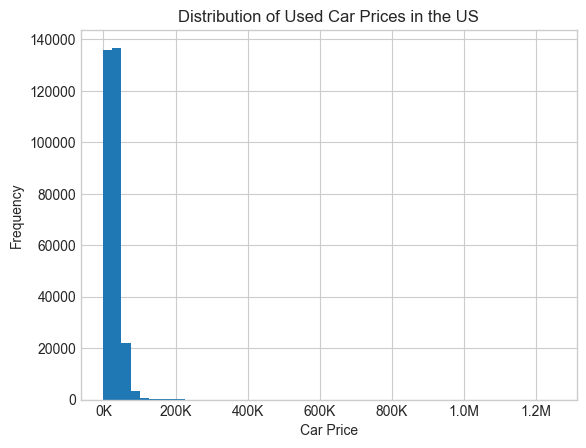

In [12]:
import matplotlib.pyplot as plt

# plot histogram of car prices
plt.hist(car_data['price'], bins=50)
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Distribution of Used Car Prices in the US')


#Formatting the Y-label of the plot so the value is not converted to exponential e.g 1e6
def format_price(value, pos):
    millions = value / 1e6
    if millions >= 1:
        return '{:.1f}M'.format(millions)
    else:
        return '{:.0f}K'.format(value/1e3)

    # Formatting the x-axis
formatter = ticker.FuncFormatter(format_price)
plt.gca().xaxis.set_major_formatter(formatter);
plt.show()

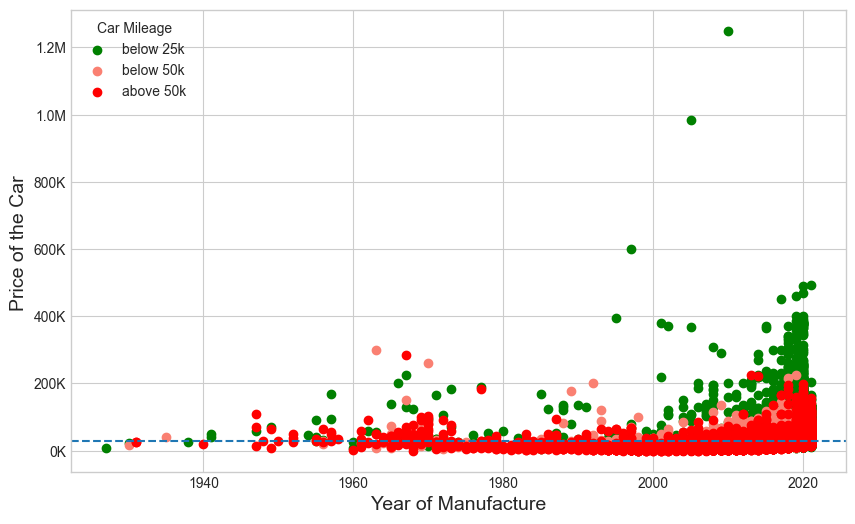

In [13]:
import numpy as np

# Classify the mileage into three categories
car_data['mileage_category'] = np.where(car_data['mileage'] <= 25000, 'below 25k',
                                        np.where(car_data['mileage'] <= 50000, 'below 50k', 'above 50k'))

# Plot the scatter plot with color coding based on mileage category
plt.figure(figsize = (10, 6))
cmap = {'below 25k': 'green', 'below 50k': 'salmon', 'above 50k': 'red'}
for mileage_category, color in cmap.items():
    car_data_category = car_data[car_data['mileage_category'] == mileage_category]
    plt.scatter(car_data_category['year'], car_data_category['price'], c=color, label=mileage_category)

# Formatting the Y-label of the plot so the value is not converted to exponential e.g 1e6
def format_price(value, pos):
    millions = value / 1e6
    if millions >= 1:
        return '{:.1f}M'.format(millions)
    else:
        return '{:.0f}K'.format(value/1e3)

# Labelling the X-axis and Y-axis of the plot
plt.xlabel("Year of Manufacture", fontsize = 14)
plt.ylabel("Price of the Car ", fontsize = 14)
# Formatting the Y-axis
formatter = ticker.FuncFormatter(format_price)
plt.gca().yaxis.set_major_formatter(formatter)
# Adding a horizontal line to depict mean price of vehicle sold
plt.axhline(y=car_data['price'].mean(), ls = '--')
# Adding a legend
plt.legend(title = 'Car Mileage');

- The plots Show's there is a positive correlation between the year and the Price of the car, The more Recent the car the higher the price.
<br>

- Furthermore the plot also shows that there is are correlation between the Price, Mileage and the Year of Manufacture however showing that majority of Cars with lower Mileage where produced from 2000 - 2020 and Mileage is great determinant of a car listing price

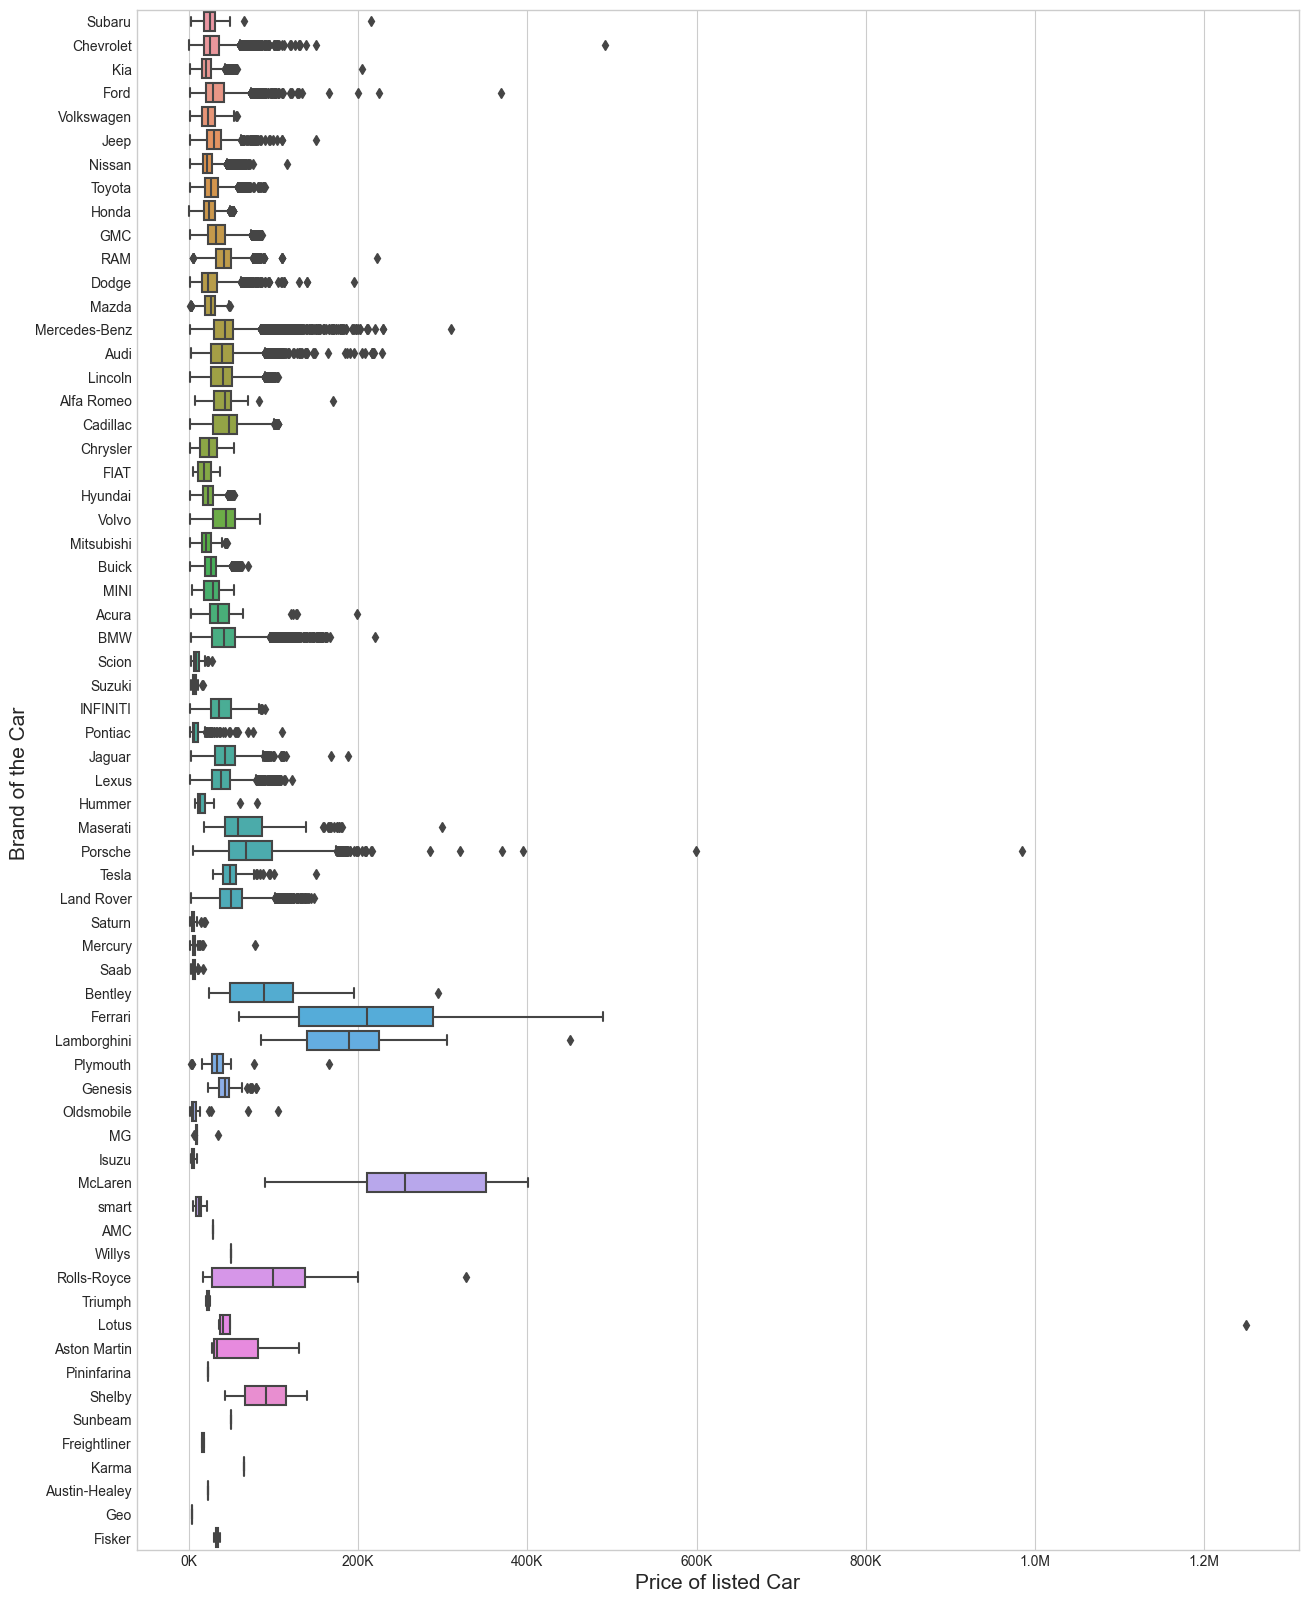

In [14]:
plt.figure(figsize=(15, 20))

sns.boxplot(data= car_data, x ='price', y='make_name')

# Formatting the Y-label of the plot so the value is not converted to exponential e.g 1e6
def format_price(value, pos):
    millions = value / 1e6
    if millions >= 1:
        return '{:.1f}M'.format(millions)
    else:
        return '{:.0f}K'.format(value/1e3)
    
# Formatting the x-axis
formatter = ticker.FuncFormatter(format_price)
plt.gca().xaxis.set_major_formatter(formatter)

#Label x and y-axis of our plot
plt.xlabel("Price of listed Car", fontsize = 15)
plt.ylabel("Brand of the Car ", fontsize = 15);

- The plot illustrates a correlation between car brands and pricing. Luxury car brands, such as Lamborghini, Rolls-Royce, Ferrari, Bentley, McLaren, and Aston Martin, exhibit a relatively higher average price compared to other car brands. On average, luxury or sports cars tend to be more expensive

<Figure size 1000x800 with 0 Axes>

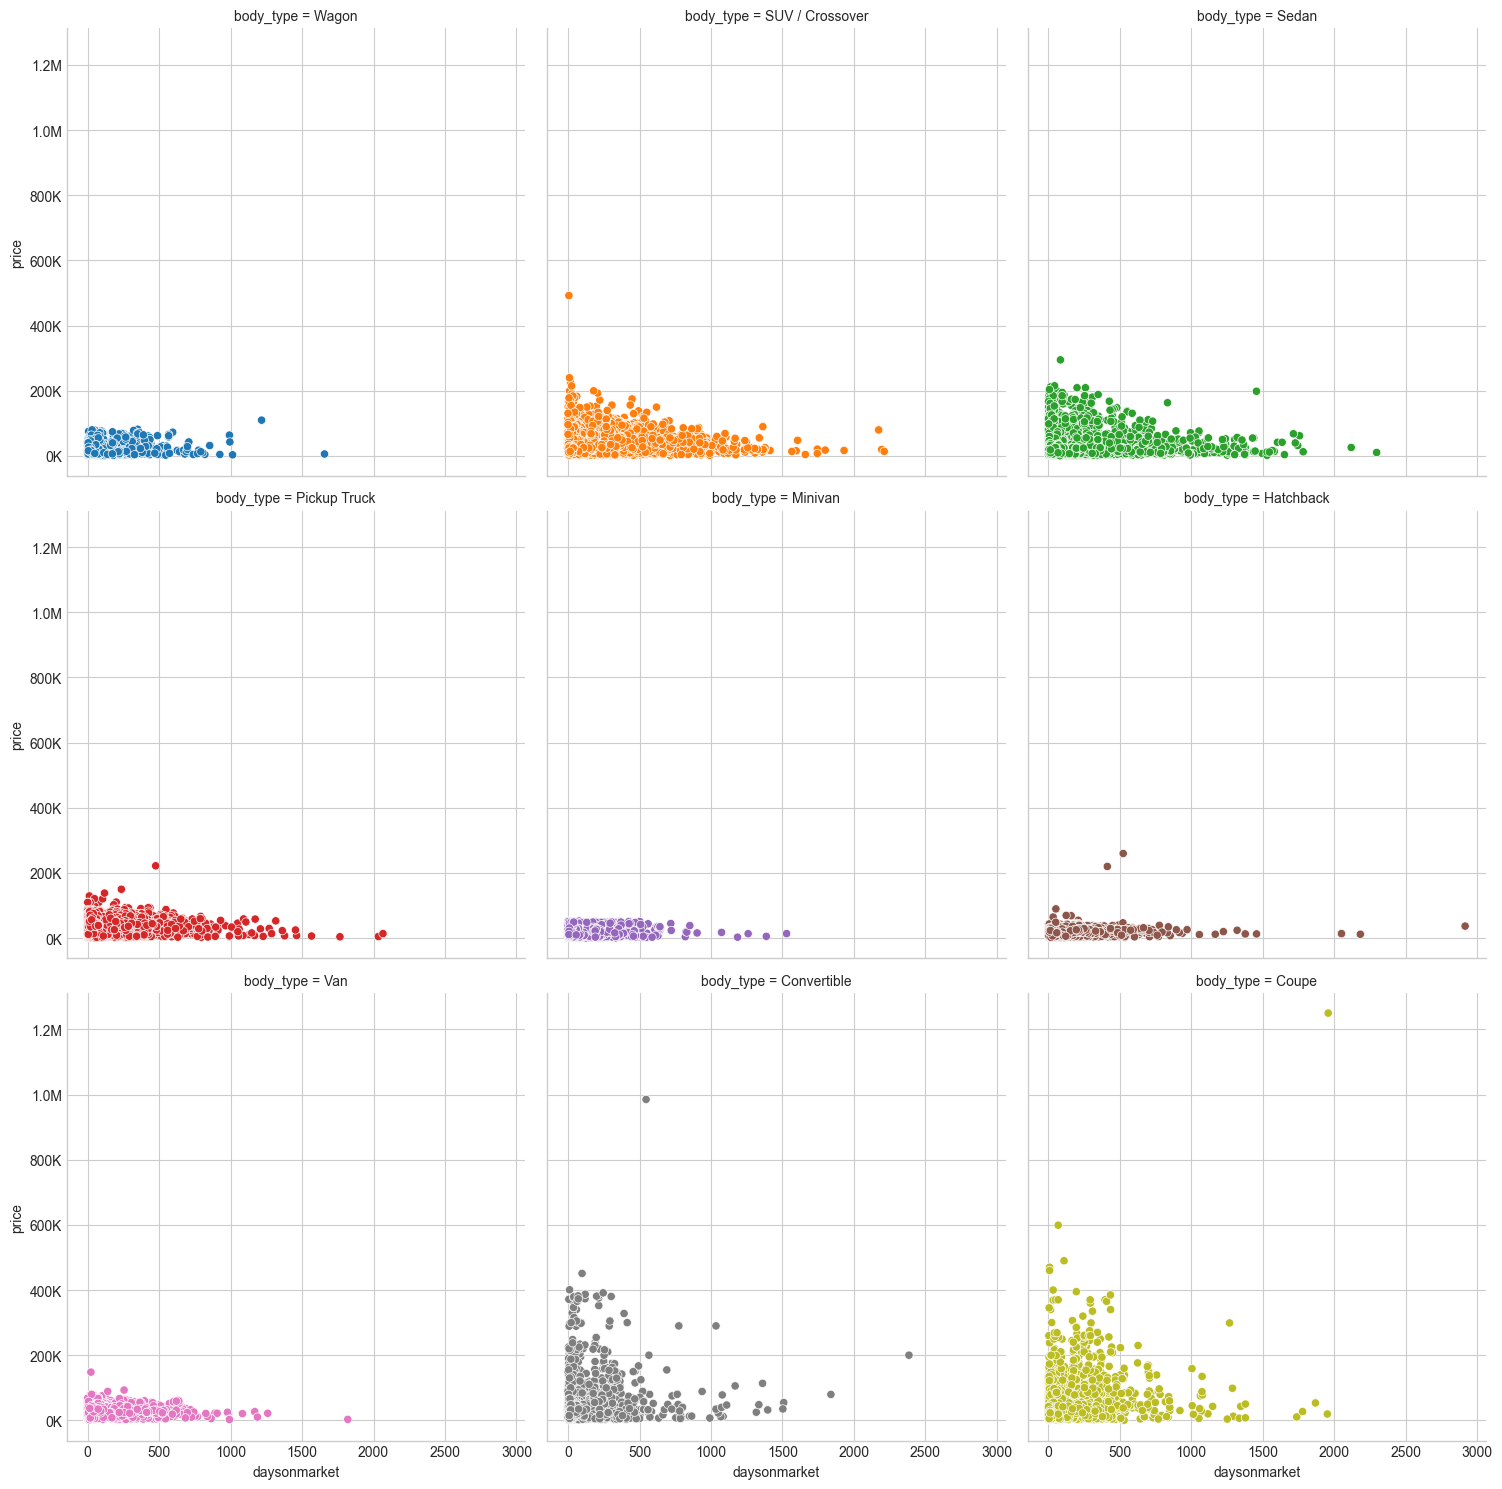

In [15]:
plt.figure(figsize = (10, 8))

sns.relplot(data=car_data, x="daysonmarket", y="price", hue = 'body_type',
            col="body_type", legend = False, col_wrap = 3)

# Formatting the Y-label of the plot so the value is not converted to exponential e.g 1e6
def format_price(value, pos):
    millions = value / 1e6
    if millions >= 1:
        return '{:.1f}M'.format(millions)
    else:
        return '{:.0f}K'.format(value/1e3)

    # Formatting the x-axis
formatter = ticker.FuncFormatter(format_price)
plt.gca().yaxis.set_major_formatter(formatter);

- The plot displays the correlation between the type of car and its listing days on the market and price.
<br>
<br>
- Luxurious vehicles, such as coupes and convertibles, tend to be more expensive compared to regular vehicles, such as vans, pickup trucks, and minivans.
<br>
<br>
- The car spends similar aount of listing time on average.

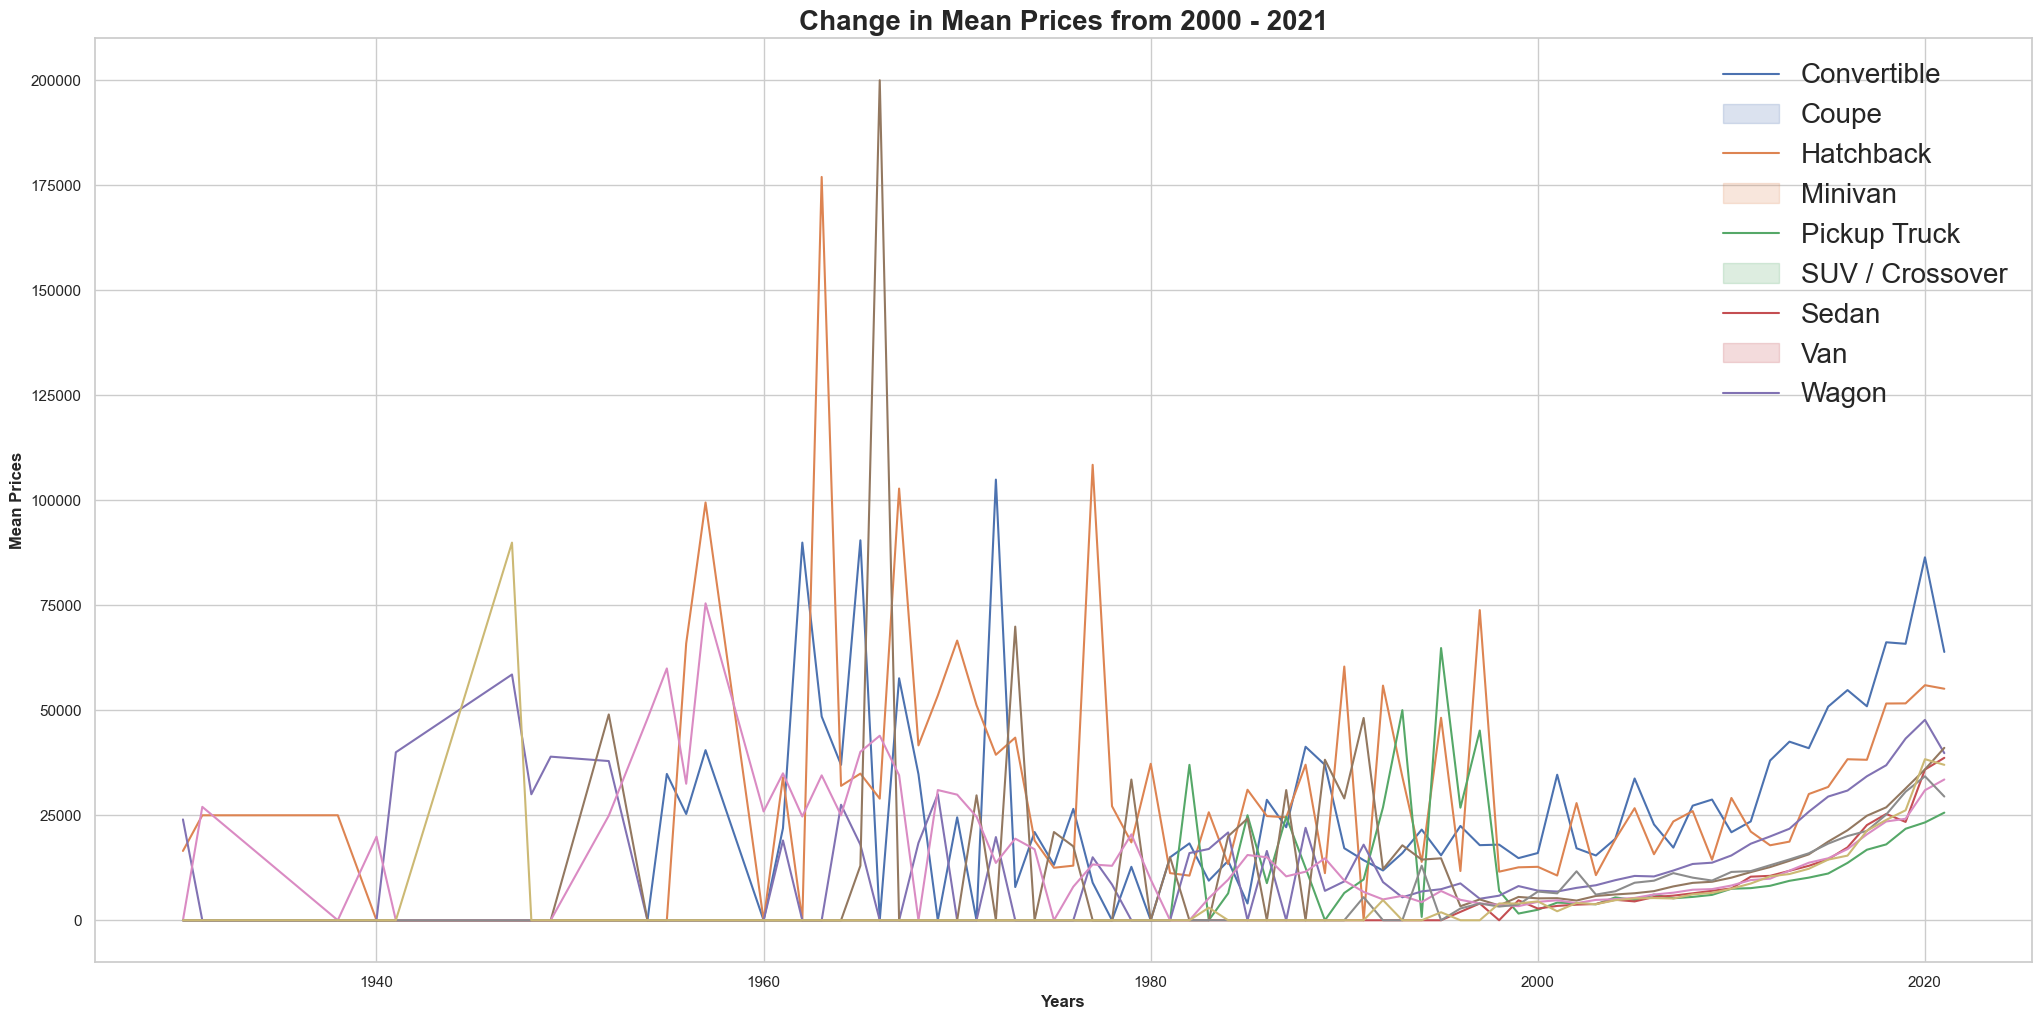

In [16]:
mean_prices = car_data.groupby(['body_type' , 'year'])['price'].mean().unstack().fillna(0)

sns.set(rc={'figure.figsize':(25,12)})
sns.set_style("whitegrid")

ax = sns.lineplot(data=mean_prices.transpose(), dashes=False)

ax.set_title("Change in Mean Prices from 2000 - 2021", weight='bold', fontsize=20)
ax.set_xlabel("Years", weight='bold')
ax.set_ylabel("Mean Prices", weight='bold')
ax.legend(labels=mean_prices.index, fontsize = 20);

- The mean price for the cars has fluctuated over the years, reaching its peak price around 1965-1970, with a decline followed by a rising trend from the 2000s onwards

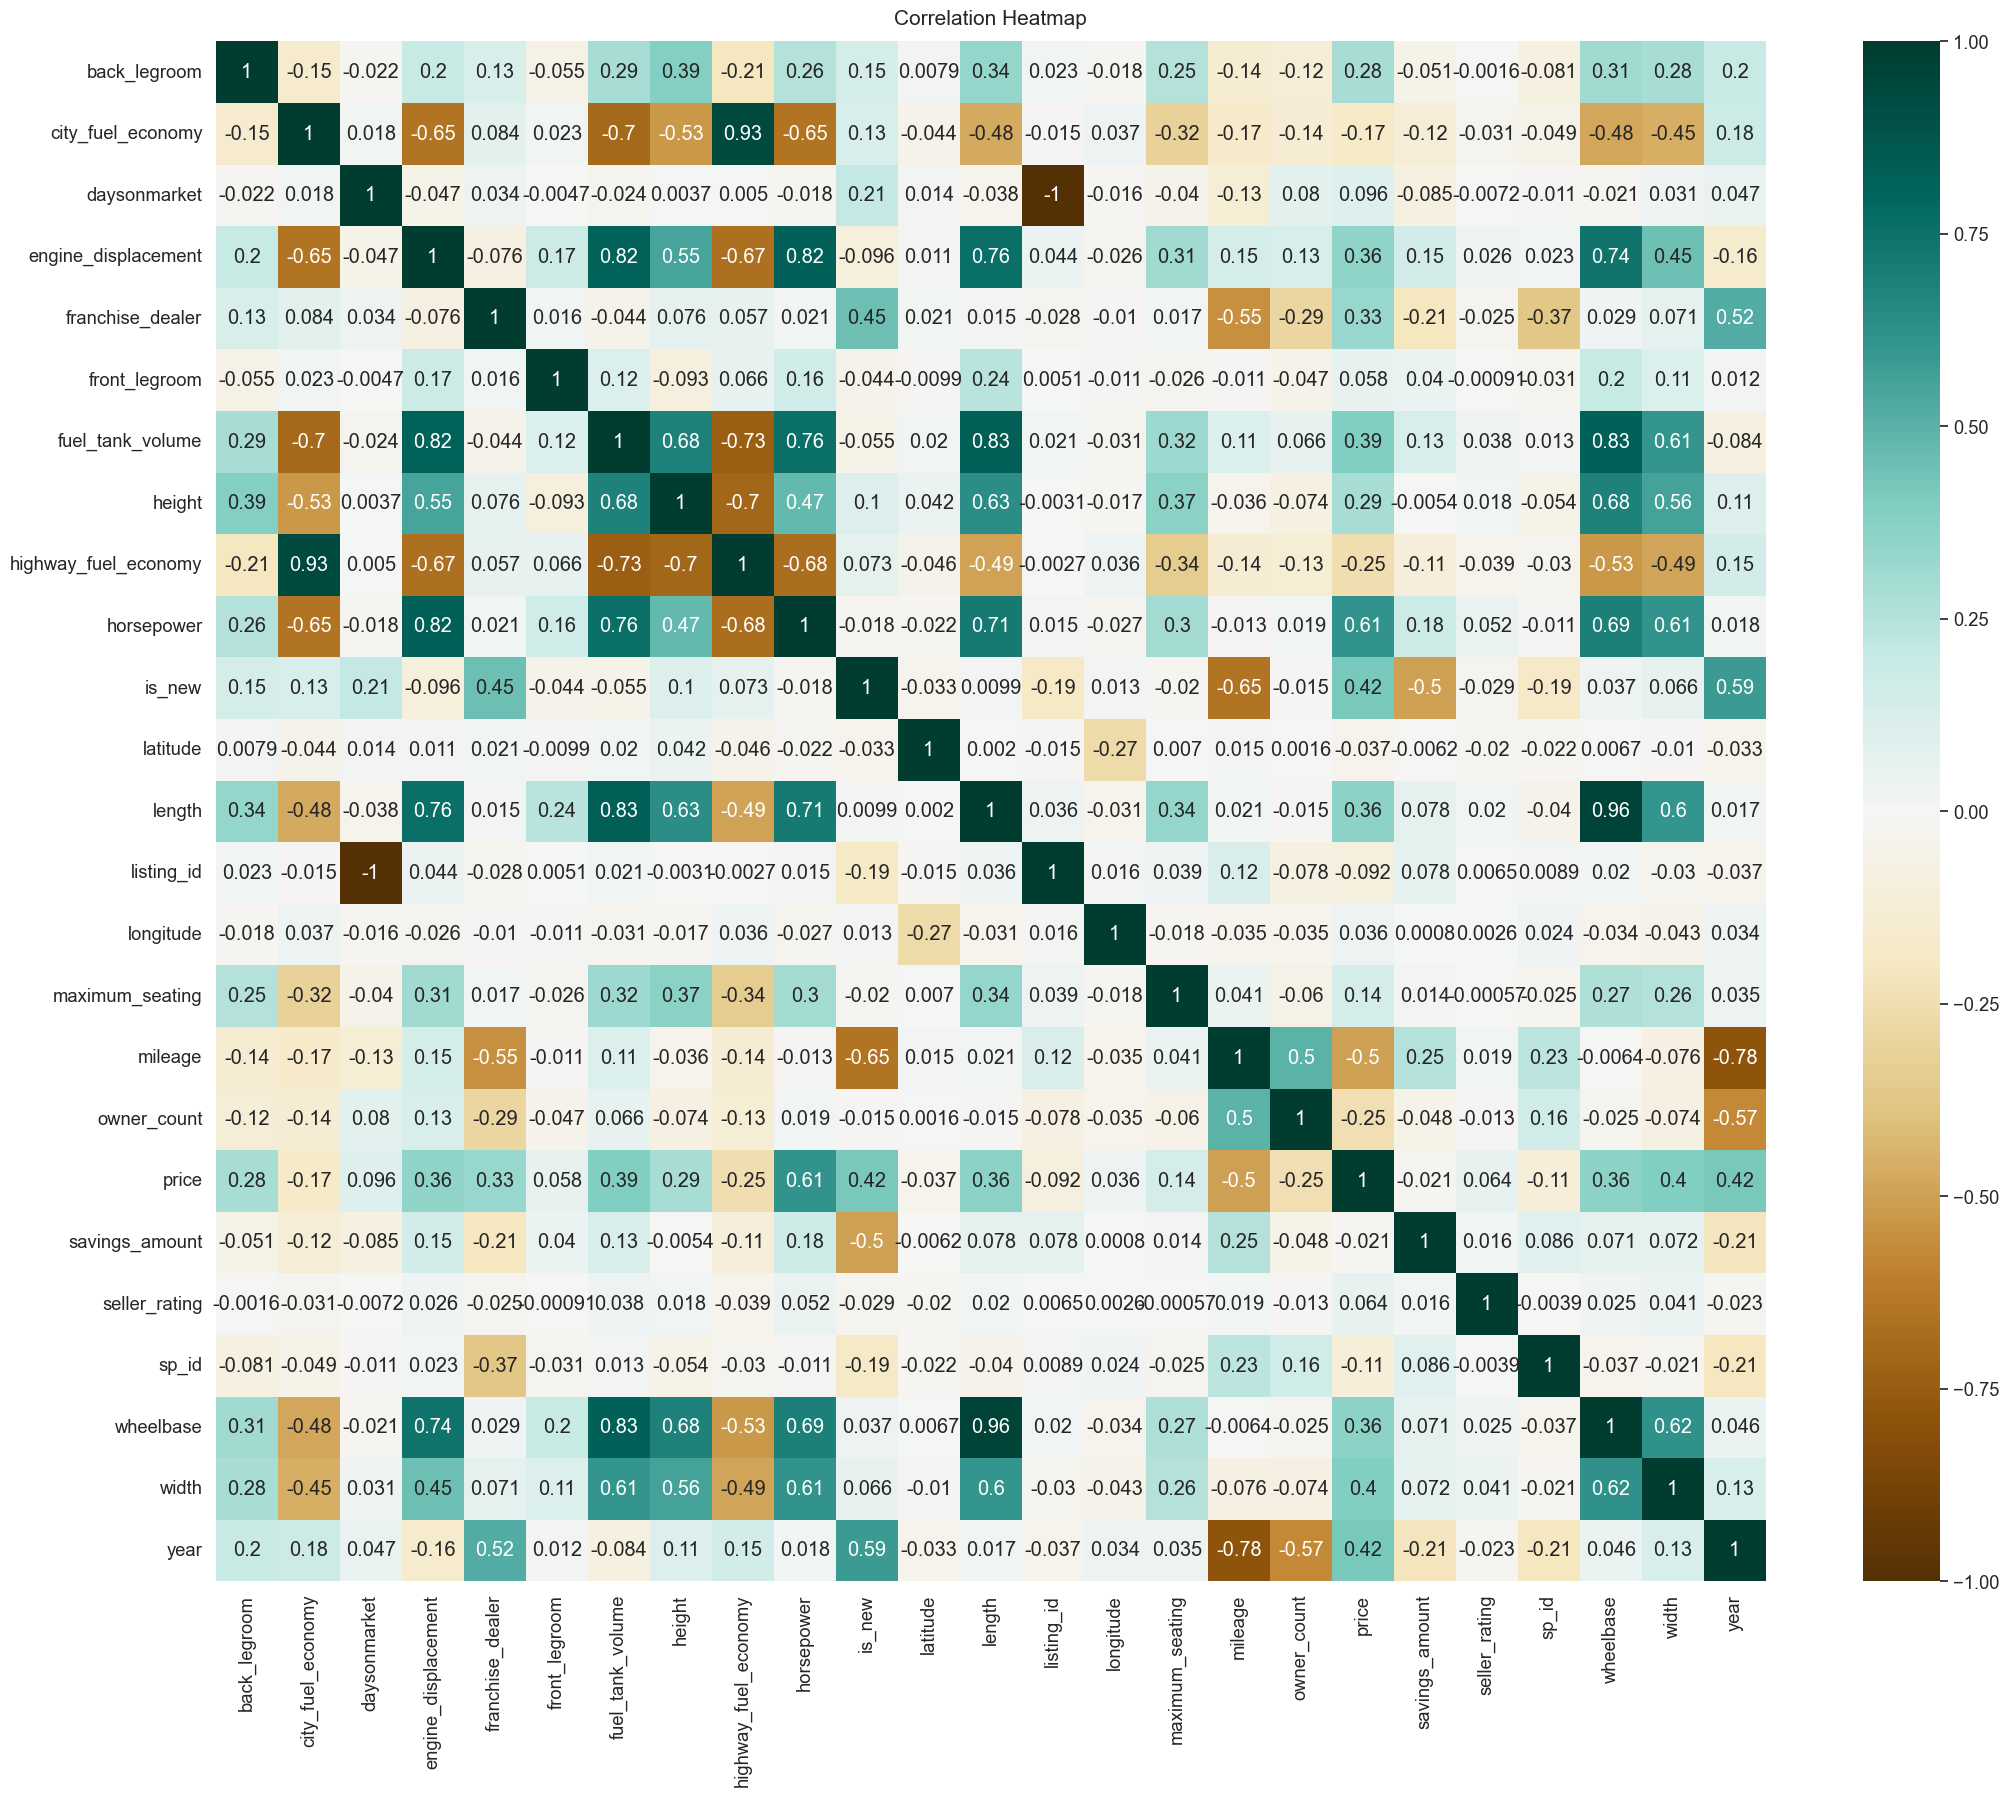

In [17]:
plt.figure(figsize = (25, 20))

#increase font size of the plot
sns.set(font_scale=1.2)

heatmap = sns.heatmap(car_data.corr(method = 'pearson'), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize':15}, pad = 12)
plt.xlabel('', fontsize = 30);

- The correlation plot reveals how variables in the dataframe correlate with another either positively or Negatively

## 3. Data Preprocessing

In [18]:
def check_null_value(dataframe):
    data_list = [] #extantiating an empty list
    for column in dataframe.columns:
        #Checking if a column Null values make up 10% or over of its total values
        if dataframe[column].isnull().sum()/len(dataframe) >= 0.2:
            data_list.append(column)
            #Return all columns where the null values are over 10% of the entire dataset
    return data_list

In [19]:
check_null_value(car_data)

['bed',
 'bed_height',
 'bed_length',
 'cabin',
 'fleet',
 'frame_damaged',
 'has_accidents',
 'isCab',
 'is_cpo',
 'is_oemcpo',
 'owner_count',
 'salvage',
 'theft_title']

In [20]:
car_data.drop(['bed', 'bed_height', 'bed_length', 'cabin', 'is_cpo', 'is_oemcpo', 'cabin',
               'fleet', 'frame_damaged', 'has_accidents', 'isCab',
               'owner_count', 'salvage', 'theft_title'], axis = 1, inplace = True)

- The following columns were dropped from the dataframe for having over 20% of its values as null values.
- Imputing the missing values for these columns might introduce bias to the model

In [21]:
car_data.drop(['listing_id', 'sp_id', 'trimId', 'trim_name', 'main_picture_url', 'savings_amount', 
              'dealer_zip', 'longitude', 'latitude', 'is_new',
               'franchise_dealer', 'franchise_make'], axis = 1, inplace = True)

**The following values were dropped from the column for being non useful-variables adding no meaning to the model**
- listing id : This represents the car listing ID
- sp ID: This represent dealer ID
- trim ID: This represents the number of a particular version of a model with a particular set of configuration.
- trim Name: This represets the name of a particular version of a model with a particular set of configuration.
- Main picture url: This represents a url or weblink of picture of the listed car
- saving amount: This is an undefined variable.
- Franchise Make: This represent the franchise that own the car brand however this has alot of missing values and it is collinear with Make_name(Which is the car_brand)

In [22]:
def duplicate_check(dataframe):
    duplicates = []
    # looping through the dataframe columns to check for duplicates
    for i, column1 in enumerate(dataframe.columns):
        for column2 in dataframe.columns[i+1:]:
            if dataframe[column1].equals(dataframe[column2]):
                duplicates.append((column1, column2))
    return duplicates

In [23]:
duplicate_check(car_data)

[('engine_cylinders', 'engine_type')]

- The code above returns columns in our dataframe having similar values hence we drop one

In [24]:
car_data.drop(['engine_cylinders'], axis =1, inplace =True)

- Engine cyclinders was dropped from the dataframe because it has exactly the same value as Engine type

In [25]:
car_data.drop(['wheel_system', 'listed_date', 'mileage_category', 'transmission', 'description',
               'listing_color', 'sp_name'], axis =1, inplace =True)

- Dropping wheel system because it contains the same information as wheel system display
- Dropping listed date because it contains similar information to DaysontheMarket column
- Dropping mileage category because it contains similar information to mileage
- Dropping Transmission from the dataframe because it contains the same information as transmission display
- Dropping the listing color because it is the dominant colour group from the exterior colour hence it contains the as exterior colour
- Dropping description column because the columns of the dataframe already describes the car.
- Dropping sp_name because this is not useful to our model

## 4. Feature Engineering the dataset

In [26]:
car_data['combine_fuel_economy'] = car_data['city_fuel_economy'] + car_data['highway_fuel_economy']

In [27]:
car_data.drop(['city_fuel_economy', 'highway_fuel_economy'], axis = 1, inplace = True)

- Create's a column Combine fuel economy which adds information Highway and City fuel Economy
<br>
<br>
- Dropping the city Fuel and highway fuel economy because we created a new feature by combining both columns

In [28]:
import pandas as pd

# Clean up the 'body_type' column
car_data['body_type'] = car_data['body_type'].astype(str).str.replace('/', '').str.replace('Crossover', '').str.strip()

# Clean up the 'power' and 'torque' columns
car_data[['power', 'torque']] = car_data[['power', 'torque']].astype(str).apply(lambda x: x.str.replace('@', '').str.replace('RPM', '').str.replace(',', ''))

# Split the 'power' column into 'horse_power' and 'power_rpm'
car_data[['horse_power', 'power_rpm']] = car_data['power'].str.split('hp', expand=True).astype(float)

# Split the 'torque' column into 'torque_lb' and 'torque_rpm'
car_data[['torque_lb', 'torque_rpm']] = car_data['torque'].str.split('lb-ft', expand=True).astype(float)

- we have successfully split the Power and Torque columns hence we drop the orignal columns

In [29]:
car_data.drop(['power', 'torque', 'horse_power'], axis = 1, inplace =True)

In [30]:
# creating a major_options_count column to count the number of major options
car_data['major_options_count'] = car_data['major_options'].str.count(',') + 1
 
# we have created the Major Options counts column so we drop the major options column
car_data.drop(['major_options'], axis = 1, inplace = True)
car_data['major_options_count']  = pd.to_numeric(car_data['major_options_count'], errors = 'coerce')

 - To make the Major Option easier to work with, A total counts of the existing options are taken and modelled in the car dataset

In [31]:
#Write a function to return all columns where the missing values in the columns are greater than zero.
def checkcols(dataframe):
    #Extantiating an empty list
    More_than_zero = [ ]
    for column in dataframe.columns:
        #Checking to see the list of columns where the null values are greater than zero
        if dataframe[column].isnull().sum() > 0:
            More_than_zero.append(column)
        elif dataframe[column].isna().sum() > 0:
            More_than_zero.append(column)
    return More_than_zero

In [32]:
checkcols(car_data)

['back_legroom',
 'engine_displacement',
 'engine_type',
 'front_legroom',
 'fuel_tank_volume',
 'fuel_type',
 'height',
 'horsepower',
 'interior_color',
 'length',
 'maximum_seating',
 'mileage',
 'seller_rating',
 'transmission_display',
 'wheel_system_display',
 'wheelbase',
 'width',
 'combine_fuel_economy',
 'power_rpm',
 'torque_lb',
 'torque_rpm',
 'major_options_count']

 - The function above returns name of all columns with missing values

##  5. Imputing missing values in the dataframe

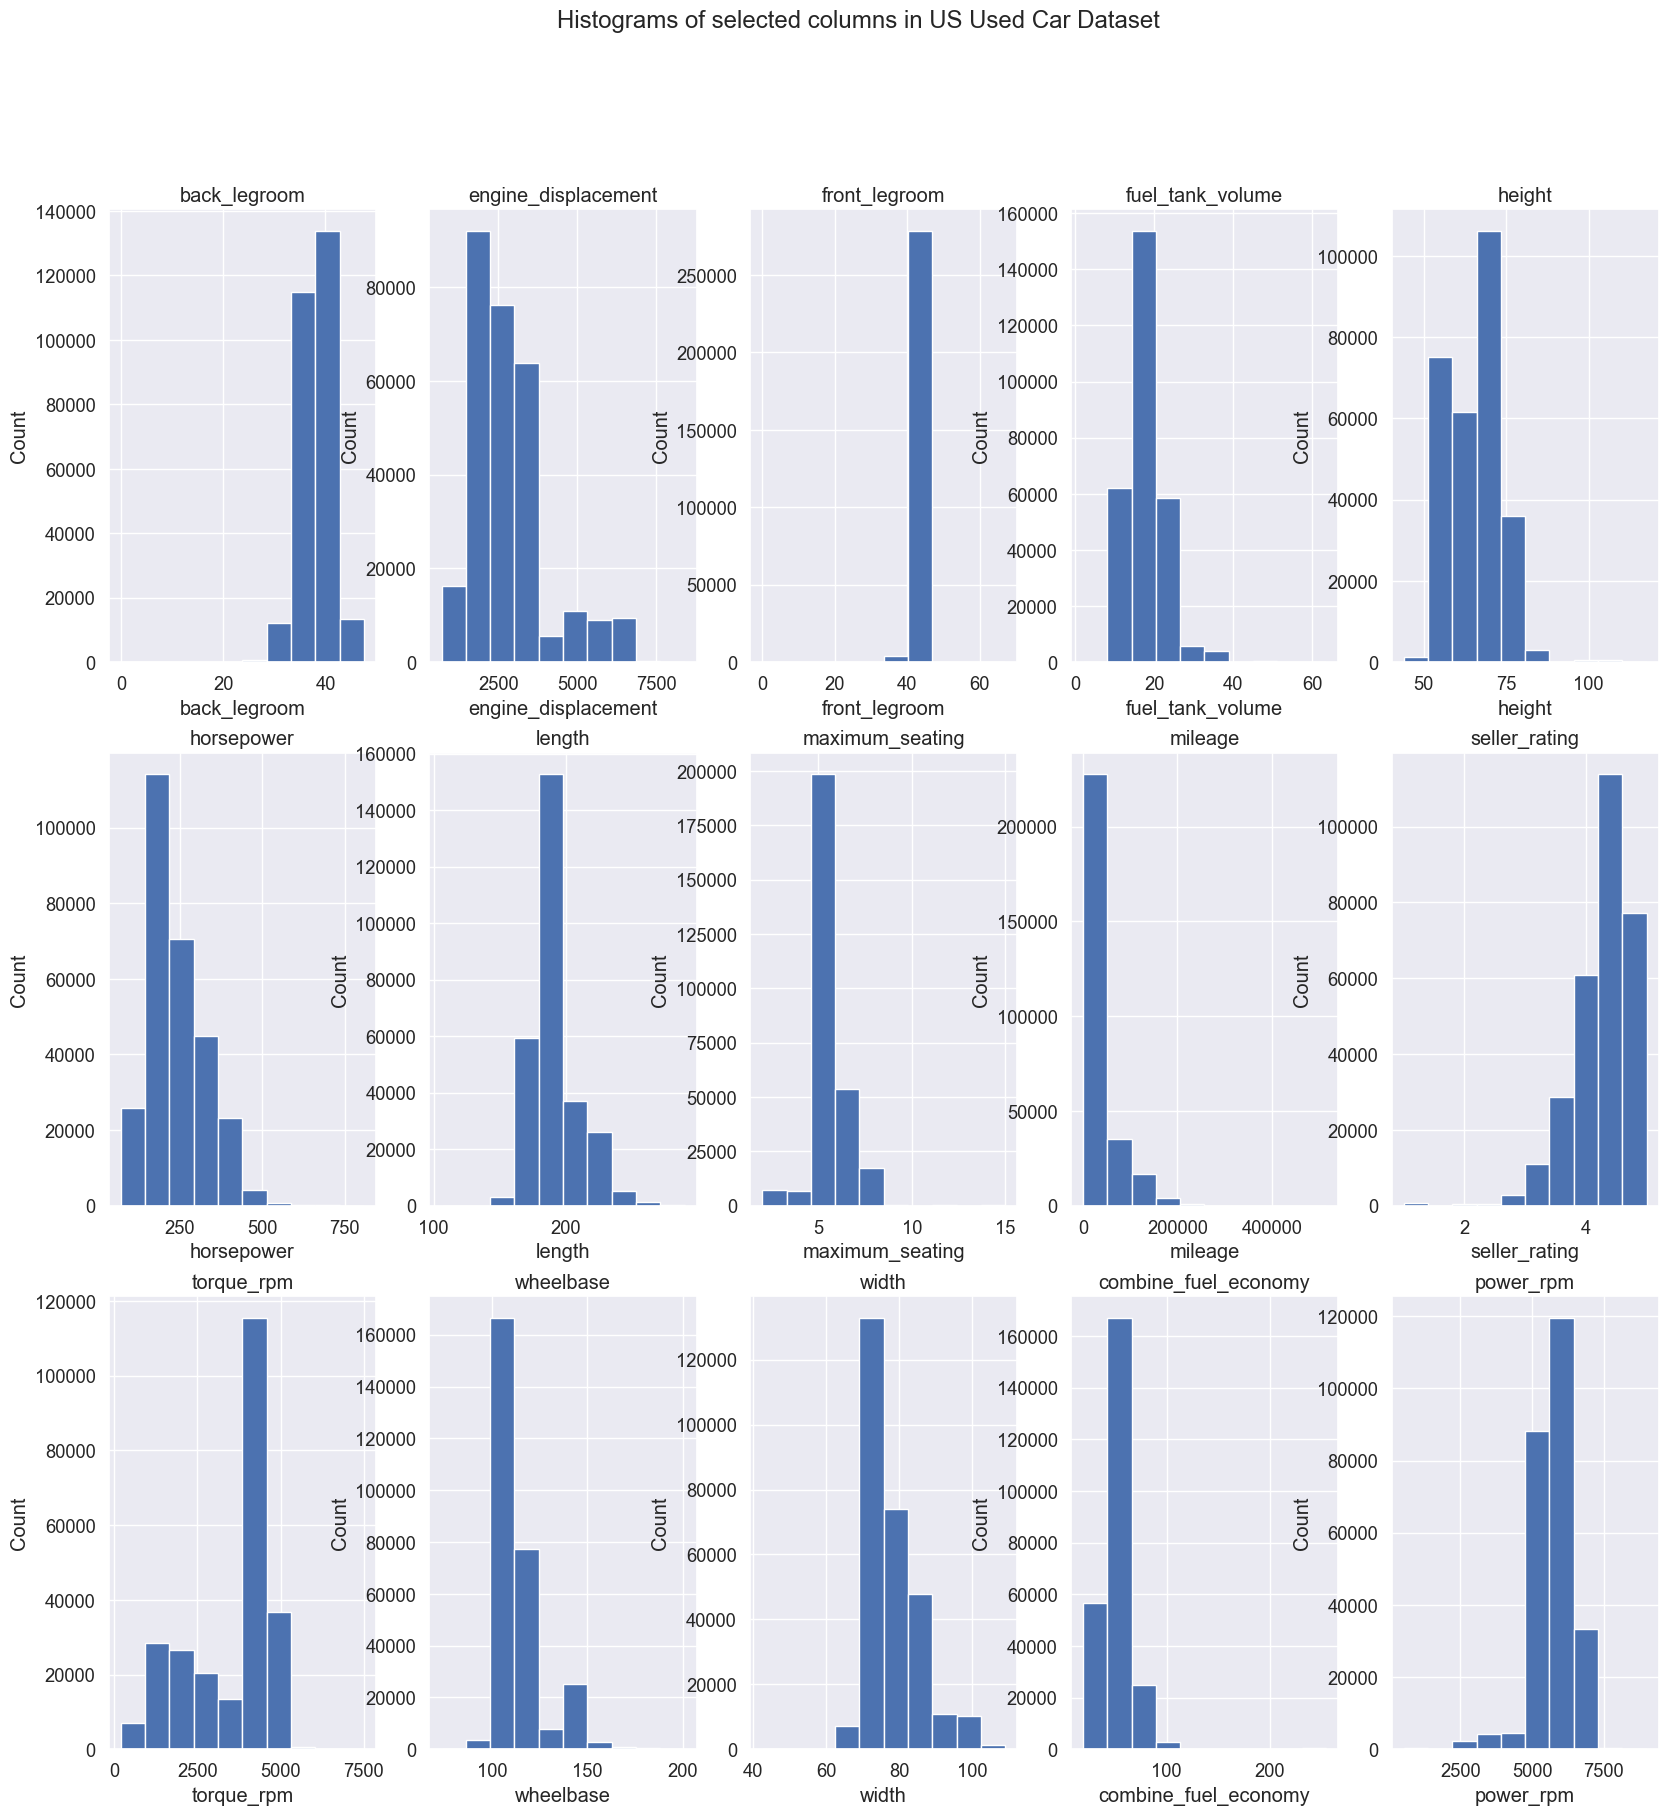

In [33]:
##Plotting the histogram of columns with missing value

# Select the columns to be plotted
cols_to_plot = ['back_legroom', 'engine_displacement',  'front_legroom',
                'fuel_tank_volume', 'height', 'horsepower', 'length', 
                'maximum_seating', 'mileage', 'seller_rating', 'torque_rpm',
                'wheelbase', 'width', 'combine_fuel_economy', 'power_rpm']

# Create a new dataframe with the selected columns
plot_df = car_data[cols_to_plot]

# Set the figure size and create the subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

# Loop through the columns and plot the histograms
for i, col in enumerate(plot_df.columns):
    ax = axes[i // 5, i % 5]
    ax.hist(plot_df[col])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Add a title for the entire plot
fig.suptitle('Histograms of selected columns in US Used Car Dataset')

# Display the plot
plt.show()

**The Plots above gives us insight on how to compute for missing values in our data**

- the distribution is highly skewed and some has outliers on the high end of the distribution hence imputing missing values with the median value can be more appropriate than using the mean. 

In [34]:
# Select the columns that have missing values
cols_with_missing_values = ['back_legroom', 'engine_displacement',  'front_legroom',
                              'fuel_tank_volume', 'height', 'horsepower', 'length', 
                        'maximum_seating', 'mileage', 'seller_rating', 'torque_rpm', 'major_options_count',
                           'wheelbase', 'width', 'combine_fuel_economy', 'power_rpm', 'torque_lb']

# Impute missing values with the median of each column
for col in cols_with_missing_values:
    median_val = car_data[col].median()
    car_data[col].fillna(median_val, inplace=True)

- Commuted for Median Values for the Non-Numeric Variables in the dataset

In [35]:
# Check columns which *aren't* numeric
for label, content in car_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

body_type
city
engine_type
exterior_color
fuel_type
interior_color
make_name
model_name
transmission_display
wheel_system_display


- Find the list of all Non-numeric Items in the dataset

In [36]:
# Turn categorical variables into numbers
for label, content in car_data.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        car_data[label] = pd.Categorical(content).codes+1 

In [37]:
corr_data = car_data.corr(method = 'pearson')
corr_price = corr_data['price'].sort_values(ascending = False)
corr_price= corr_price.to_frame(name='correlation').reset_index().rename(columns={'index': 'variable'})

In [38]:
# Define the threshold for correlation coefficient
threshold = 0.05

# Filter out the variables that have a correlation coefficient less than the threshold
filtered_df = corr_price[corr_price['correlation'].abs() <= threshold]

# Print the remaining variables
print(filtered_df['variable'])

17     front_legroom
18        model_name
19    interior_color
20              city
21    exterior_color
Name: variable, dtype: object


In [39]:
car_data.drop(['front_legroom','model_name', 'interior_color', 'city', 'exterior_color'], axis = 1, inplace = True)

- This means that the variables that have a correlation coefficient less than or equal to 0.05 or 5% are removed.

## 6. Scaling and fitting Our Machine Learning Model

In [40]:
# Select the features and target variable
X = car_data.drop(['price'], axis=1)
y = car_data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(n_jobs = -1),
          "Lasso": linear_model.Lasso(alpha=0.1),
          "Elastic_net": ElasticNet(random_state=0),
          "Ensemble Regressor " : RandomForestRegressor(max_samples = 1000)}

#Setting max_samples on the random forest regressor to 1000 means every n_estimator (default 100) in our RandomForestRegressor 
#will only see 1000 random samples from our DataFrame instead of the entire 30,000

In [42]:
# fitting Our Machine Learning Model.
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(28)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [43]:
%%time
np.random.seed(200)
import random
evaluate_model = fit_and_score(models, X_train, X_test, y_train, y_test)
evaluate_model_df = pd.DataFrame(evaluate_model, index = [1])
evaluate_model_df

Wall time: 8.7 s


,Linear Regression,Lasso,Elastic_net,Ensemble Regressor
1,0.642998,0.642998,0.641262,0.812718


## Visual Comparism of Our Model Performance

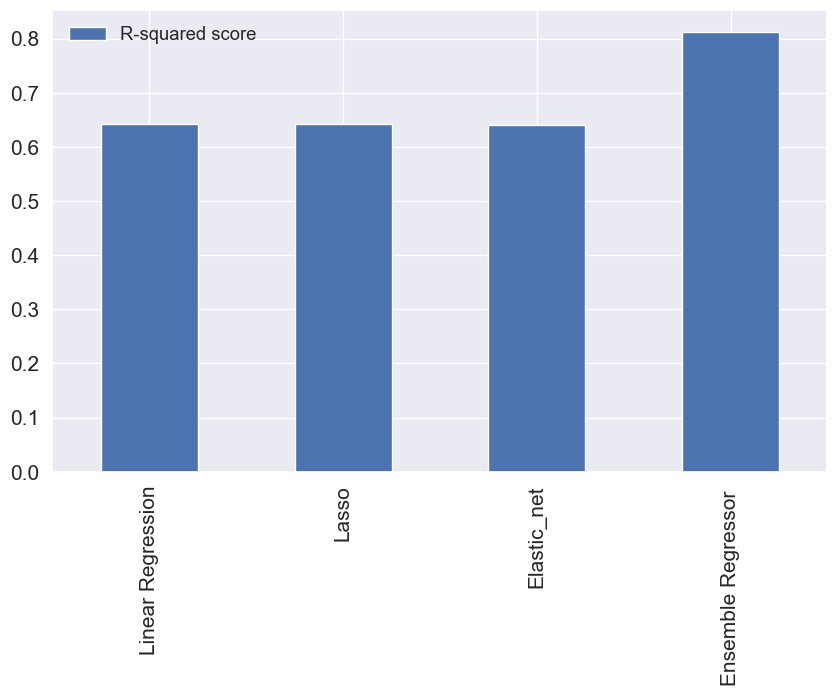

In [44]:
visual_compare = pd.DataFrame(evaluate_model, index=['R-squared score'])
visual_compare.T.plot.bar(figsize = (10, 6), fontsize = 15);

- Compared to Lasso which uses a penalization term L1 norm and Elastic net which combines both the L1 and L2 norm penalization term. The Forest Random Forest Regressor select feature variable based on split nodes, the best split is chosen from each node hence allowing it prevent Overfitting.
<br>  
<br> 

- We scale the Varibales and fit Model again

In [45]:
# Select the features and target variable
X = car_data.drop(['price'], axis=1)
y = car_data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [46]:
%%time
np.random.seed(200)
evaluate_model_2 = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)
evaluate_model_df = pd.DataFrame(evaluate_model_2, index = [1])
evaluate_model_2

Wall time: 4.39 s


{'Linear Regression': 0.6436958251193996,
 'Lasso': 0.6437036365140318,
 'Elastic_net': 0.09282285458727113,
 'Ensemble Regressor ': 0.8062681687199554}

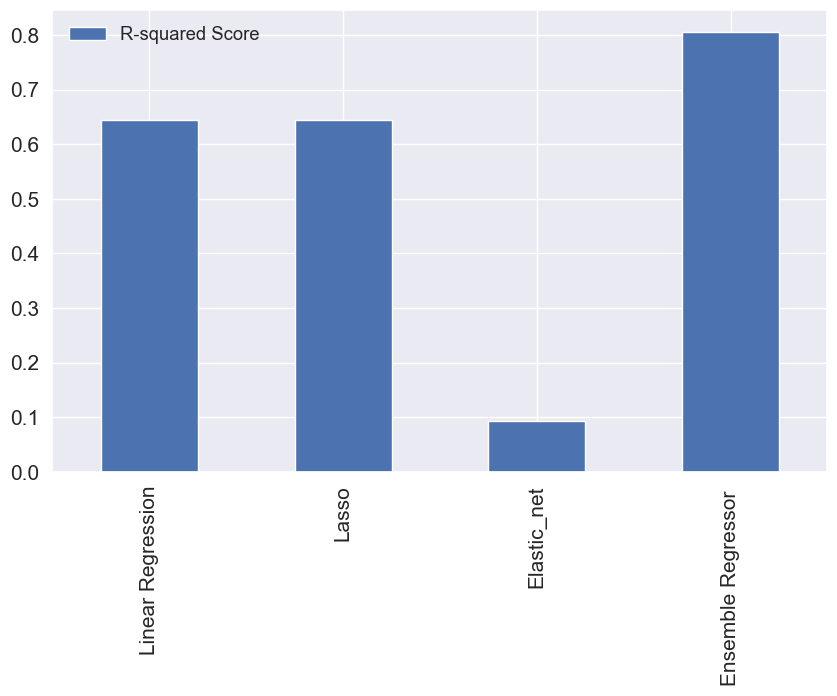

In [47]:
visual_compare = pd.DataFrame(evaluate_model_2, index=['R-squared Score'])
visual_compare.T.plot.bar(figsize = (10, 6), fontsize = 15);

- scaling the covariates slightly improved our Model and Elastic net performed poorly on the scaled dataset. One reason could be due  to the distribution of the features, since the features are not normally distributed or have a high level of skewness, standardizing them can result in a loss of information and a suboptimal model.<br>  
<br> 

## 7. Tuning the Hyper Parameter of the Models

#### Tuning the hyper parameter of the  Elastic Net model

In [48]:
#Testing various values of Alpha for elastic net Model.
np.random.seed(200)
alpha_values = np.arange(0.1, 1.1, 0.1)
alpha_values

#Create a functiom that loops into the alpha values runs the elastic model and scores the model
elastic_net_scores = [ ]
for alpha in alpha_values:
    elastic_net = ElasticNet(alpha = alpha)
    elastic_net.fit(X_train_scaled, y_train)
    model_score = elastic_net.score(X_test_scaled, y_test)
    elastic_net_scores.append((alpha, model_score))

In [49]:
elastic_net_scores

[(0.1, 0.33460998431340916),
 (0.2, 0.2529902191971698),
 (0.30000000000000004, 0.2065598882928854),
 (0.4, 0.17527883810740463),
 (0.5, 0.15247725202226914),
 (0.6, 0.13502801583054058),
 (0.7000000000000001, 0.12121041748948791),
 (0.8, 0.10998281444425428),
 (0.9, 0.10067231859150694),
 (1.0, 0.09282285458727113)]

In [50]:
# Create a DataFrame from the list of tuples
df = pd.DataFrame(elastic_net_scores, columns=['Alpha', 'Model Score'])
df['difference'] = df['Model Score'].diff().fillna(0)
df

,Alpha,Model Score,difference
0,0.1,0.334610,0.000000
1,0.2,0.252990,-0.081620
2,0.3,0.206560,-0.046430
3,0.4,0.175279,-0.031281
4,0.5,0.152477,-0.022802
5,0.6,0.135028,-0.017449
6,0.7,0.121210,-0.013818
7,0.8,0.109983,-0.011228
8,0.9,0.100672,-0.009310
9,1.0,0.092823,-0.007849


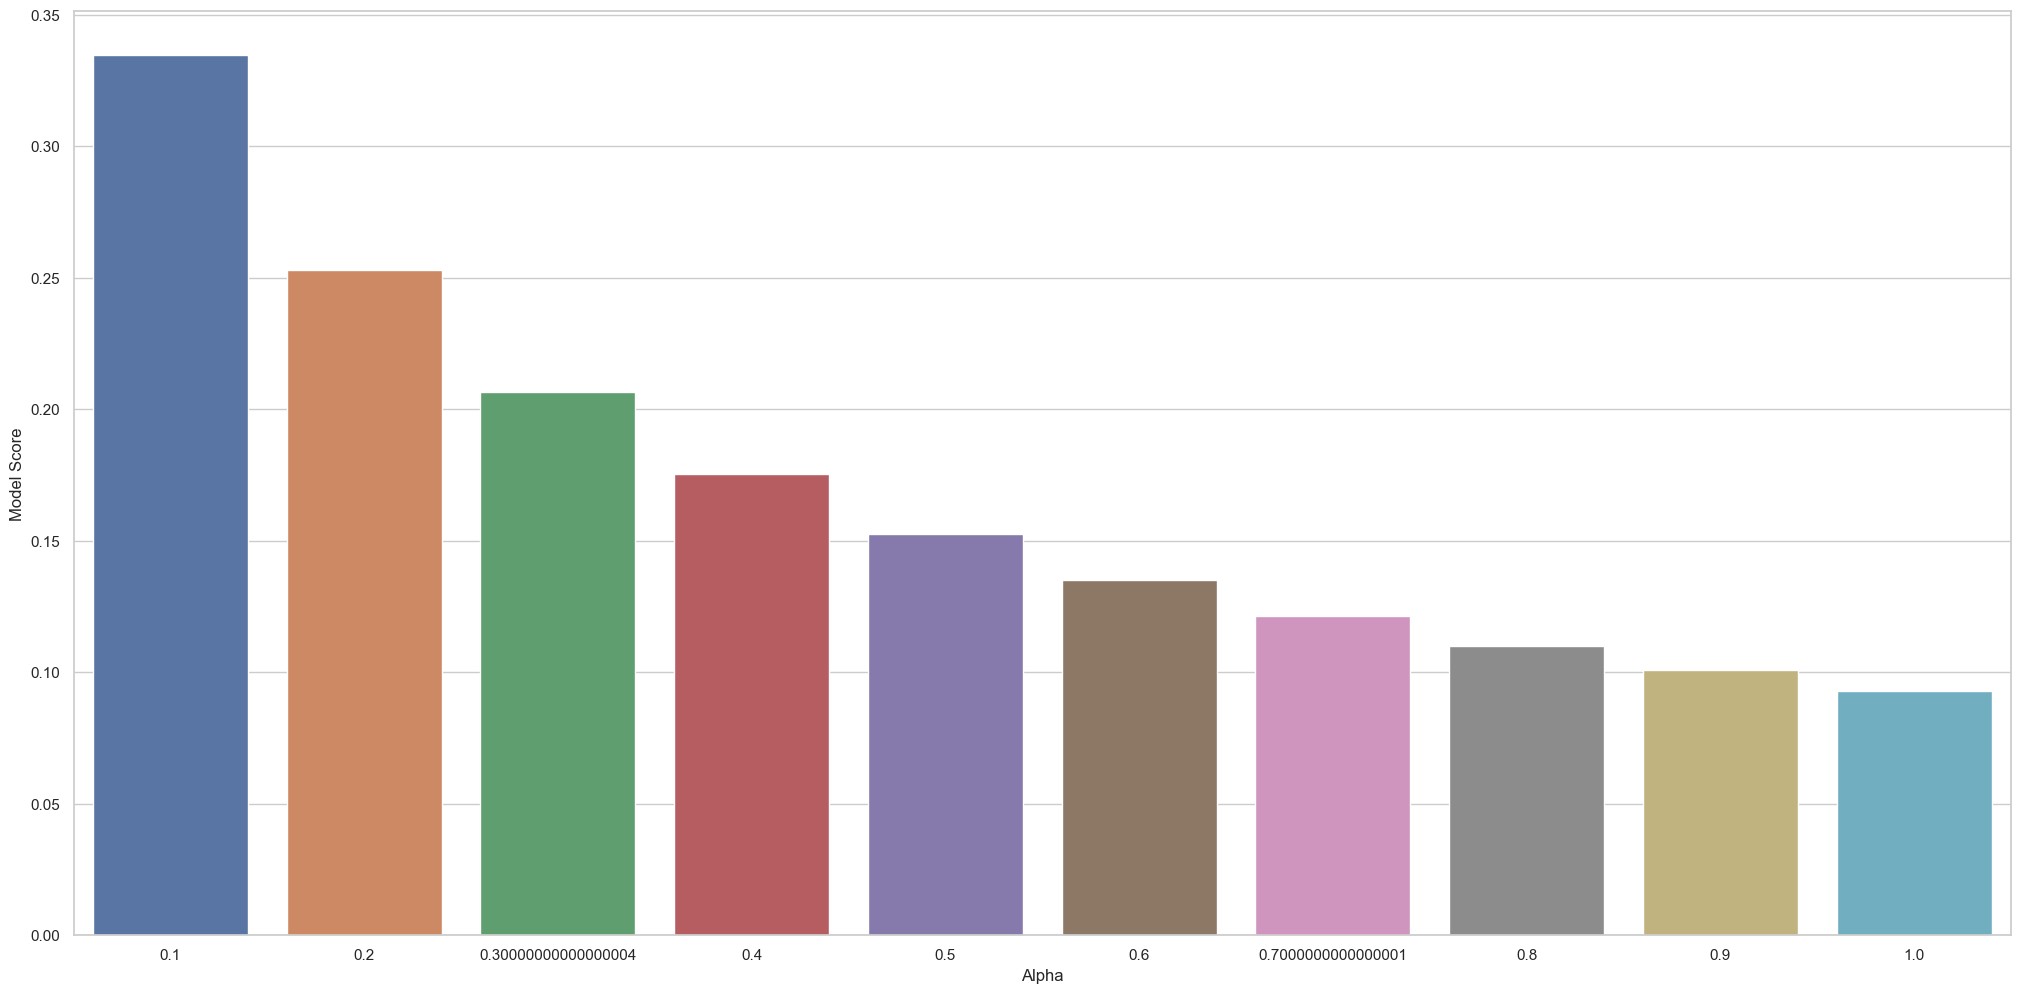

In [51]:
# create the plot
sns.set(style="whitegrid")
ax = sns.barplot(x="Alpha", y="Model Score", data=df)
plt.show()

- scaling the covariates slightly improved our Model and Elastic net performed poorly on the scaled dataset. One reason could be due  to the distribution of the features, since the features are not normally distributed or have a high level of skewness, standardizing them can result in a loss of information and a suboptimal model
<br>
<br>
- The increasing alpha values multiples the L1 norm penalty term hence higher values of alpha shrink the regression coefficients more leading to a model with fewer features.

$\lambda\left(\alpha \sum_{j=1}^p |\beta_j| + (1-\alpha)\frac{1}{2} \sum_{j=1}^p \beta_j^2 \right) > 0$, $0 \leq \alpha \leq 1$


#### Hyper Tuning the Random Forest Regressor Model

In [52]:
%%time
np.random.seed(200)

from sklearn.model_selection import RandomizedSearchCV

ensemble_dict = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

ensemble_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=ensemble_dict,
                              cv=10,
                              verbose=True)

ensemble_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 2min 6s


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [53]:
# Find the best parameters using Grid Search CV
ensemble_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [54]:
ensemble_model.score(X_test_scaled, y_test)

0.8506093782114869

 - After Hyper Parameter Tuning Our Model got an 85%. it is an  % Increase from earlier model fitted

## 8. Fitting the Best Model, Making Predictions and Evaluating Model

In [55]:
np.random.seed(200)
best_model = RandomForestRegressor(n_estimators = 40,  min_samples_split = 2,  min_samples_leaf = 1,
                                   max_samples = 10000, max_features = 'sqrt', max_depth = 10)

# Fit the model to the data
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=10000,
                      n_estimators=40)

In [56]:
# Get the coefficients of the model
best_model_coefficients = best_model.feature_importances_

In [57]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_model_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

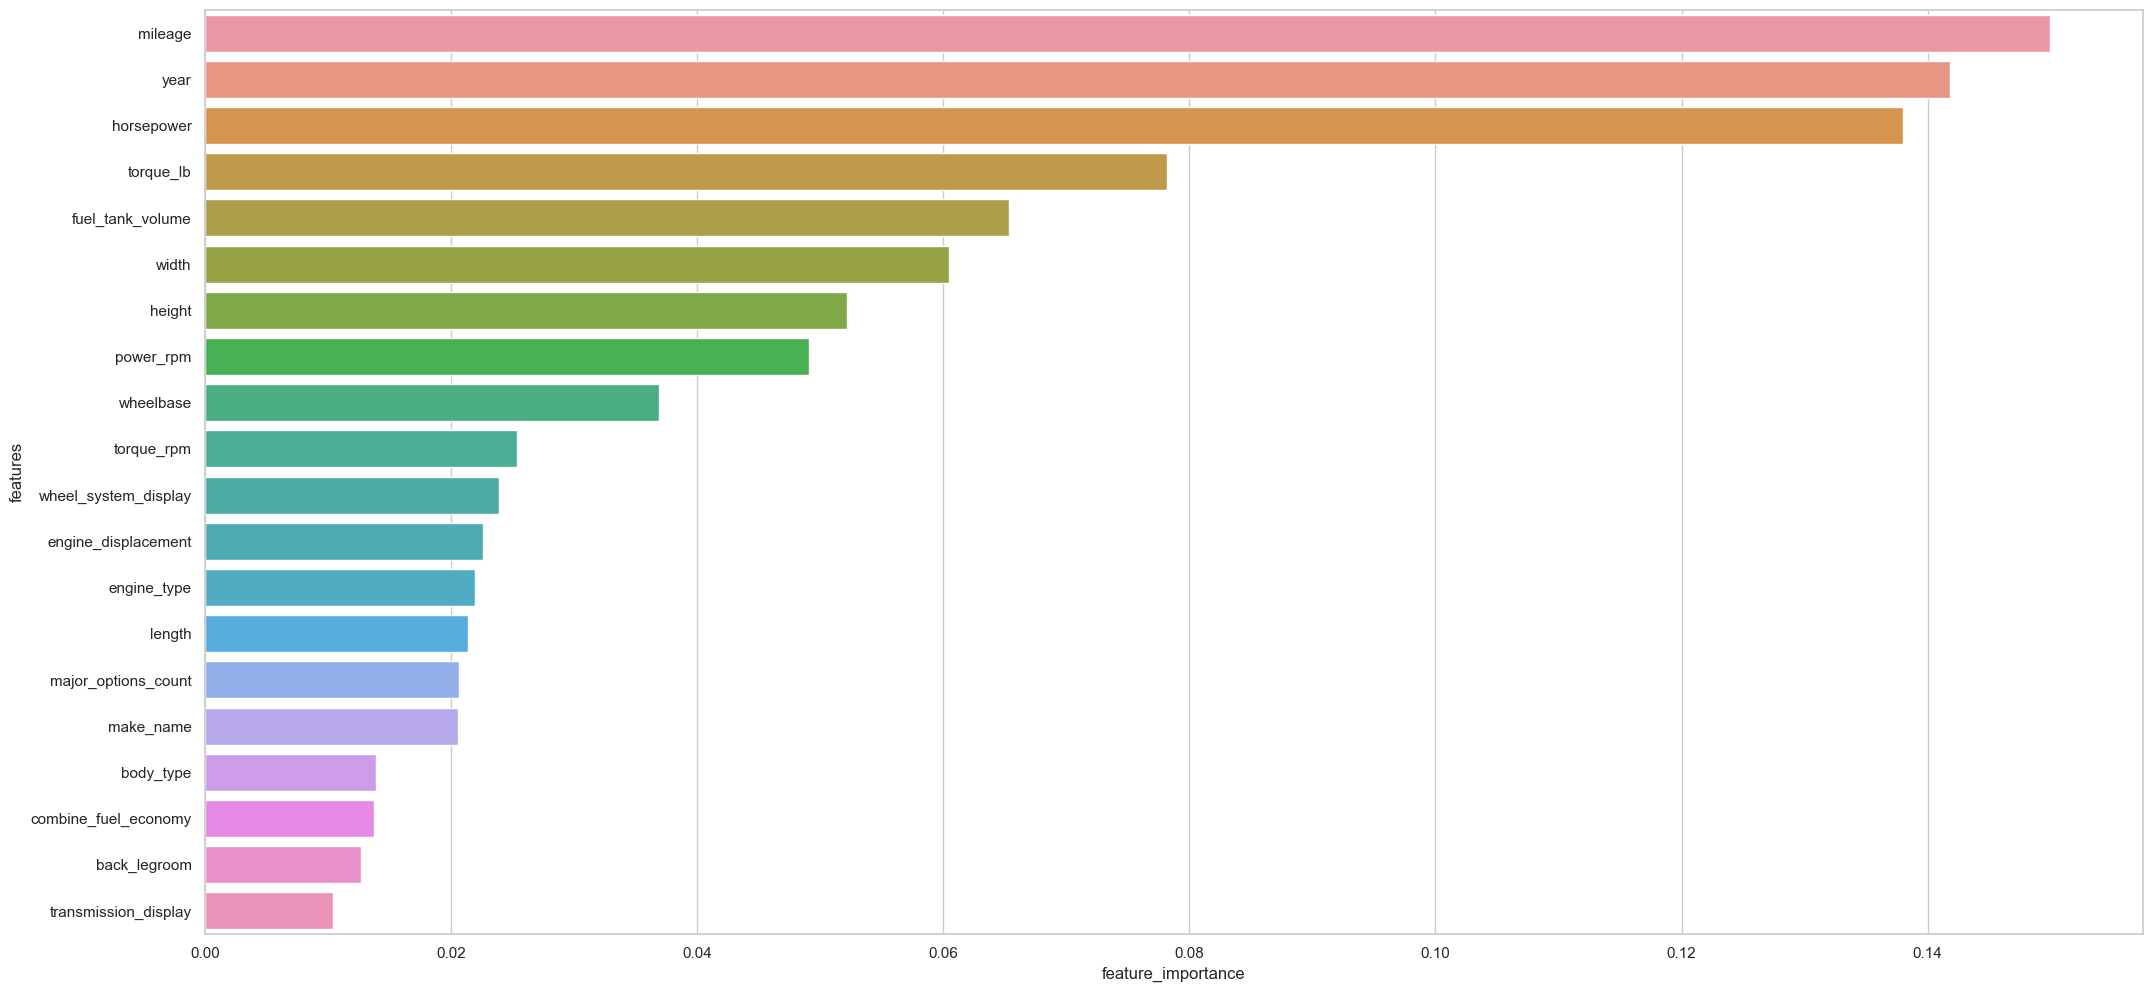

In [58]:
plot_model_features(X_train_scaled.columns, best_model_coefficients)

 -  The plot shows the most important covariates for predicting the price of a used car according to the random forest regressor model.
 <br>
 
 - Horsepower, Mileage and Year of Manufacture constitute some of the most important items for predicting the price of a used car
 <br>
 
 - HorsePower, Mileage, Year account's for 60% of significant covariate in predicting the price.

In [59]:
#Evaluate Models Performance
np.random.seed(200)
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def evaluate_model(model):
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    scores = {"MAE": mean_absolute_error(y_test, test_preds),
              "RMSLE": rmsle(y_test, test_preds)}
    return scores

 - RMSLE measures the ratio between the predicted and actual values, and is often used when the dependent variable has a wide range of values or when the distribution is highly skewed hence it is our choice evaluation metric over MSE.

In [60]:
results = evaluate_model(best_model)
results = pd.DataFrame(results, index=[0])
results

,MAE,RMSLE
0,3580.668335,0.200425


###### Mean Absolute Error
- The Mean Absolute Error which measure the forecasting distance of the model to the True Value is appoximately around 3,580 on the test prediction. This would mean on average the model prediction of a used car price(i.e the forecast's distance) is 3,580.
- Example true value of a used car price is 12,895 the model forcast is around 10,000(distance of 3,580).
<br>
<br>

###### Root Mean Squared Logarithm Error
- RMSLE measures the ratio between the predicted and actual values of the target variable using the natural logarithm of those values, because of the skewness of our variable the RMSLE is great for measuring performance.
- The Model RMSLE is between 0.20 which signifies a great performance.
<br>
<br>

### Conclusion

- The feature importances of the best model the random forest regressor indicates that Mileage, ```Year```, ```horsepower```, ```torque_pound (torque_lb)```, and ```tank volume``` are amongst the major features that determine the price of a used car. The data used in the analysis is unevenly distributed and skewed, suggesting the possibility of the presence of outliers in the data. <br><br>

- The best-performing model in this study is the Random Forest Regressor, which achieved an accuracy of 85%, outperforming other models, However, the Random Forest Regressor is less sensitive to outliers and has a better bias-variance trade-off by combining multiple decision trees to make predictions. The evaluation metrics, including MAE and RMSE indicate that the Random Forest Regressor performed relatively well.<br><br>

- Further research could explore using statistical techniques such as Principal Component Regression, which transforms predictor variables into a smaller set of uncorrelated variables, or models like Ridge Regression, which introduce a penalty term that minimizes the impact of multicollinearity by shrinking the coefficients of highly correlated predictor variables, helping to stabilize the model and reduce the impact of multicollinearity.<br><br>
